<h1 style=text-align:center;font-size:50px;color:darkslategray;> How to build your  first recommendation app with <b>streamlit 
    


# step 0:  Import necessary libraries

In [ ]:
#import streamlit as st 
import pandas as pd
import plotly.graph_objects as go
#from streamlit_lottie 
import json


 <h3 style="padding: 20px;text-align: left;font-size: 16px; border-radius:5px; background-color:powderblue; font-family: Comic Sans MS; color:black;word-spacing: 4px;line-height: 1.3 ;">Note : we cannot run steamlit code inside kaggle notebook you need to use other IDE like pycharm or vscode or swift etc mostly .py extension file ,so here we are not importing steamlit but you need to import when you try to run below code in your editor 

# step 1: drawing app layout 

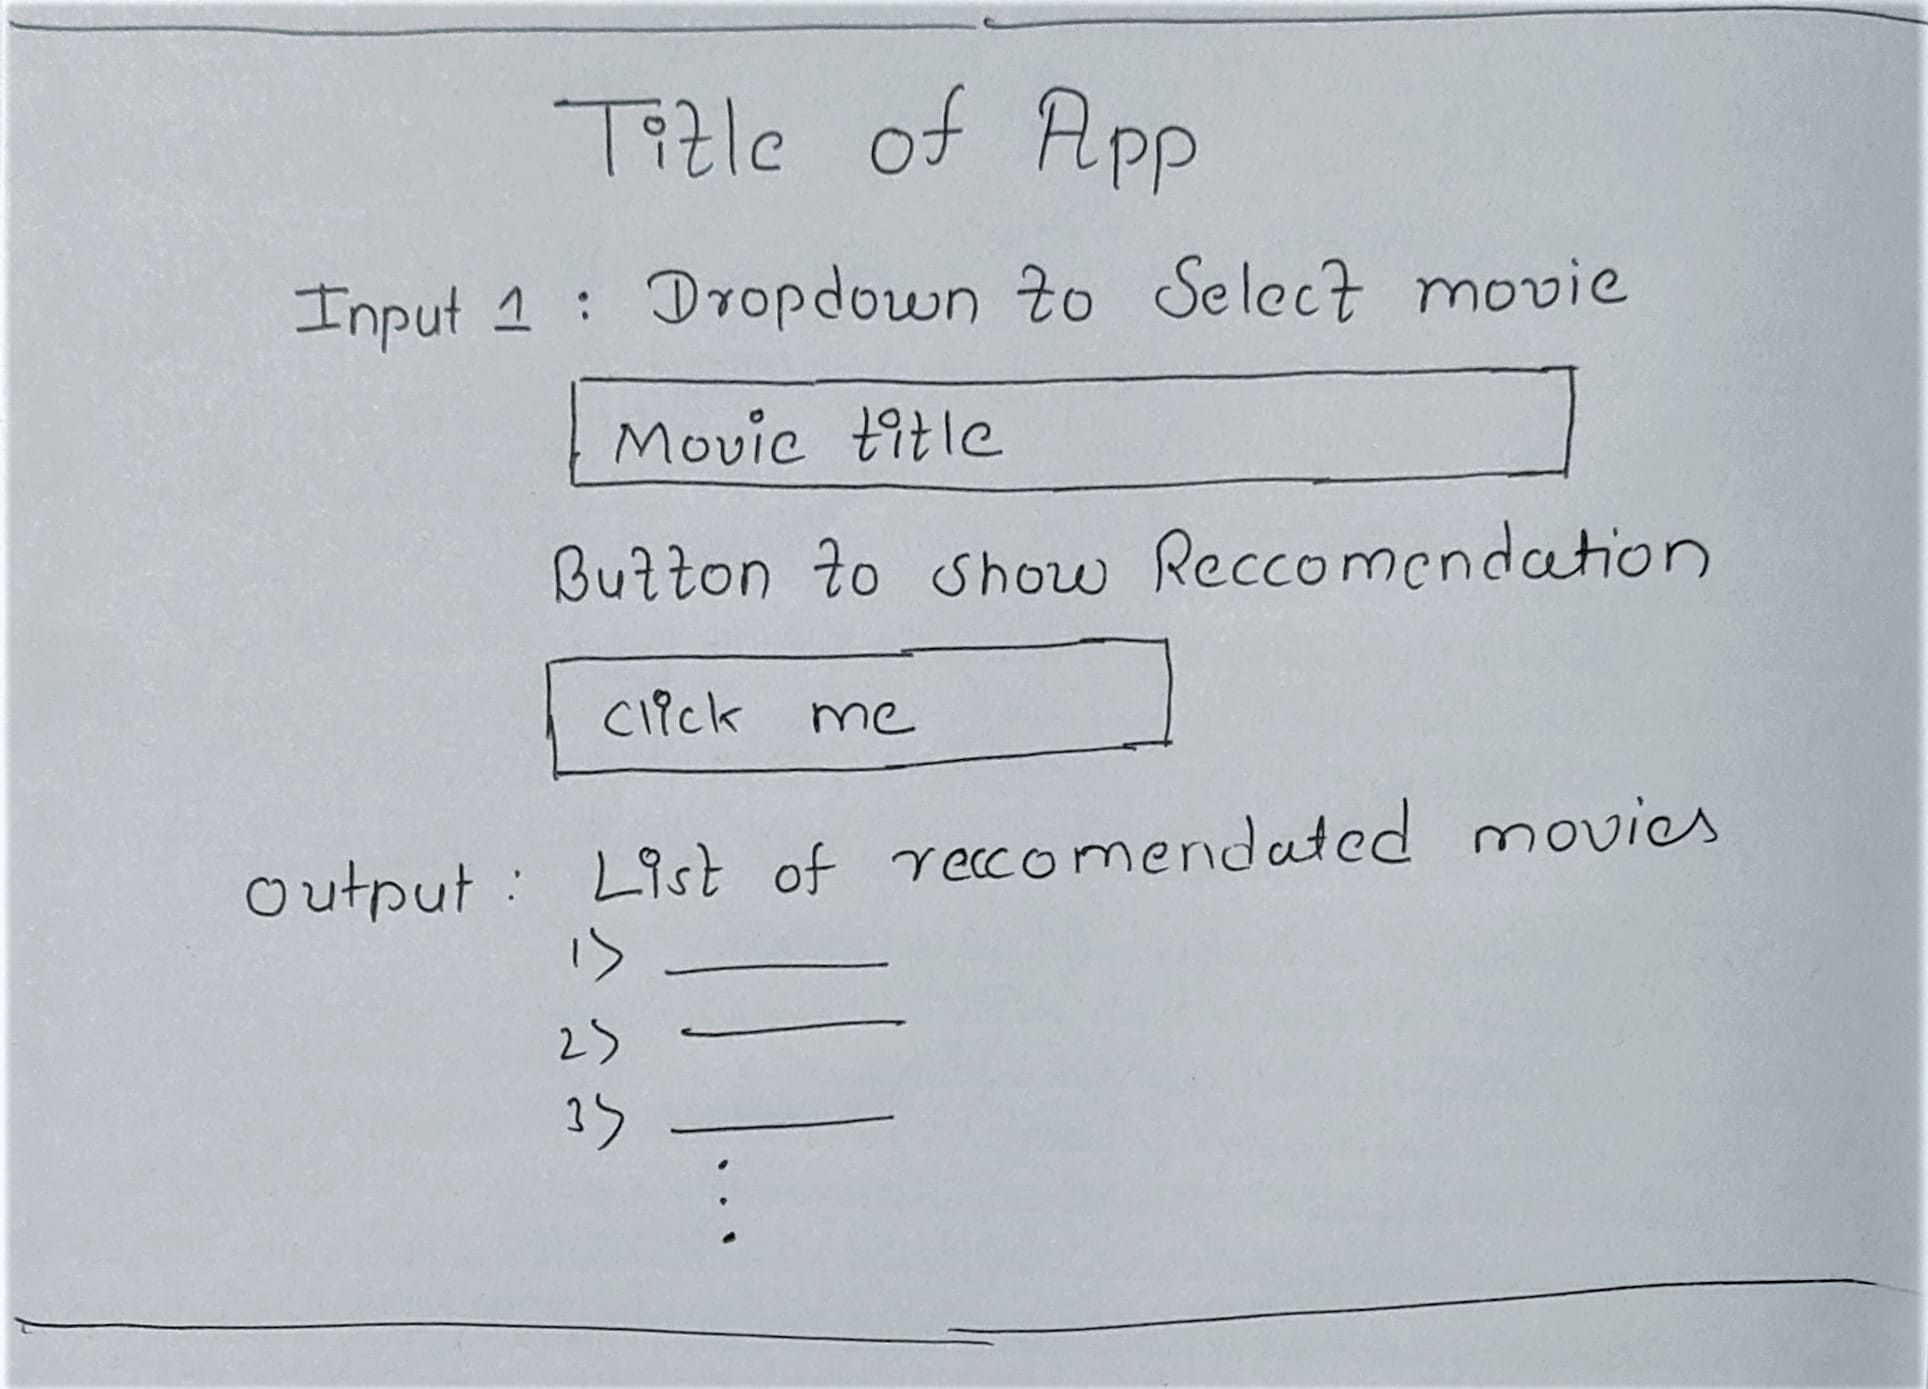

In [ ]:
#####################################################################################################################

# step 2: building recommendation system

 <h3 style="padding: 20px;text-align: left;font-size: 16px; border-radius:5px; background-color:yellow; font-family: Comic Sans MS; color:black;word-spacing: 4px;line-height: 1.3 ;"> <b>credit</b>:This portion of notebook borrowed from KUTLUK ATALAY kaggle notebook<br>
notbook link : <b>https://www.kaggle.com/code/kutlukatalay/recommendation-system-for-netflix

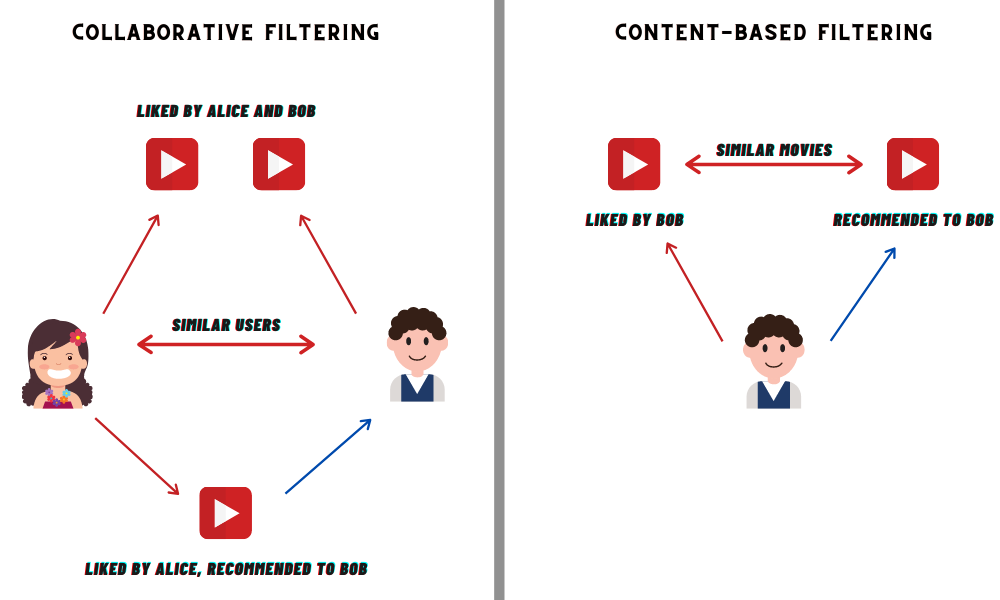

#### The TF-IDF(Term Frequency-Inverse Document Frequency (TF-IDF) ) score is the frequency of a word occurring in a document, down-weighted by the number of documents in which it occurs. This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

[Recommendation Systems Source - 1](https://towardsdatascience.com/recommendation-systems-explained-a42fc60591ed)
[Recommendation Systems Source - 2](https://medium.com/recombee-blog/machine-learning-for-recommender-systems-part-1-algorithms-evaluation-and-cold-start-6f696683d0ed)

In [ ]:
df = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
df.head(2)

 <h3 style="padding: 20px;text-align: left;font-size: 16px; border-radius:5px; background-color:powderblue; font-family: Comic Sans MS; color:black;word-spacing: 4px;line-height: 1.3 ;">we need only two column form above dataset title and description  , with the help of common narrative and words in descrption we will build our simple recommendation system

In [ ]:
#we are need only two column form above dataset 
df[['title','description']]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

netflix_data = df.copy()


tfidf = TfidfVectorizer(stop_words='english')
netflix_data['description'] = netflix_data['description'].fillna('')
tfidf_matrix = tfidf.fit_transform(netflix_data['description'])



### The Cosine similarity score is used since it is independent of magnitude and is relatively easy and fast to calculate.


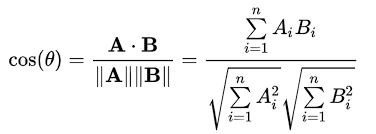

### Cosine similarity is a measure of similarity, often used to measure document similarity in text analysis.

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

indices = pd.Series(netflix_data.index, index=netflix_data['title']).drop_duplicates()

def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return netflix_data[['title','description']].iloc[movie_indices]

In [ ]:
get_recommendations('Ganglands')

In [ ]:
########################################################################################################################

# step 3 : creating streamlit app

## 1] adding title 

<h3  style=color:#222222;padding:20px;text-align:left;border-radius:5px;background-color:#F1ABB9;>st.header(Netflix Movie Recommendation System )

**output:**
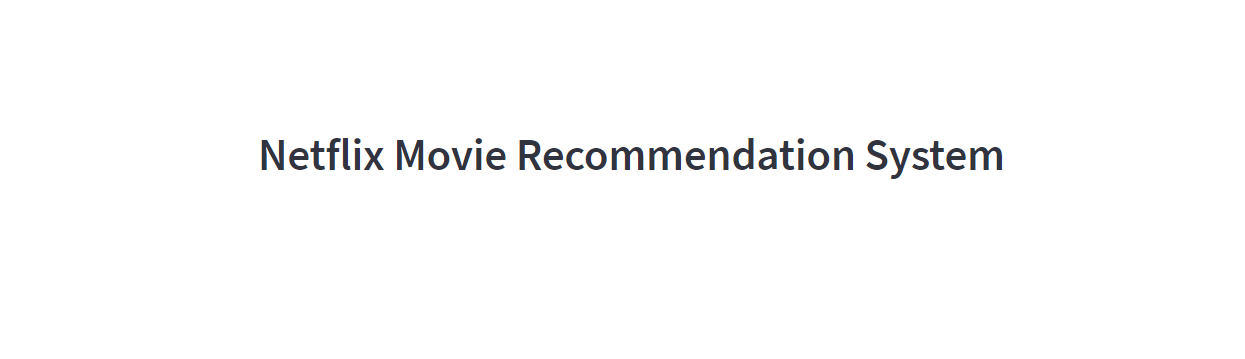

 <h3 style="padding: 20px;text-align: left;font-size: 16px; border-radius:5px; background-color:powderblue; font-family: Comic Sans MS; color:black;word-spacing: 4px;line-height: 1.3 ;">note : you can use other streamlit text components like st.title, st.subheadr,st.write, st.markdown etc<br>    
click the link to get more details :<b>https://docs.streamlit.io/library/api-reference/text

## 2] adding selectbox



In [ ]:
movie_list = netflix_data['title'].values
movie_list # list of all movies in our dataset

<h3  style=color:#222222;padding:20px;text-align:left;border-radius:5px;background-color:#F1ABB9;>selected_movie = st.selectbox(
    "Type or select a movie from the dropdown",
   <b> movie_list
)

**output:**
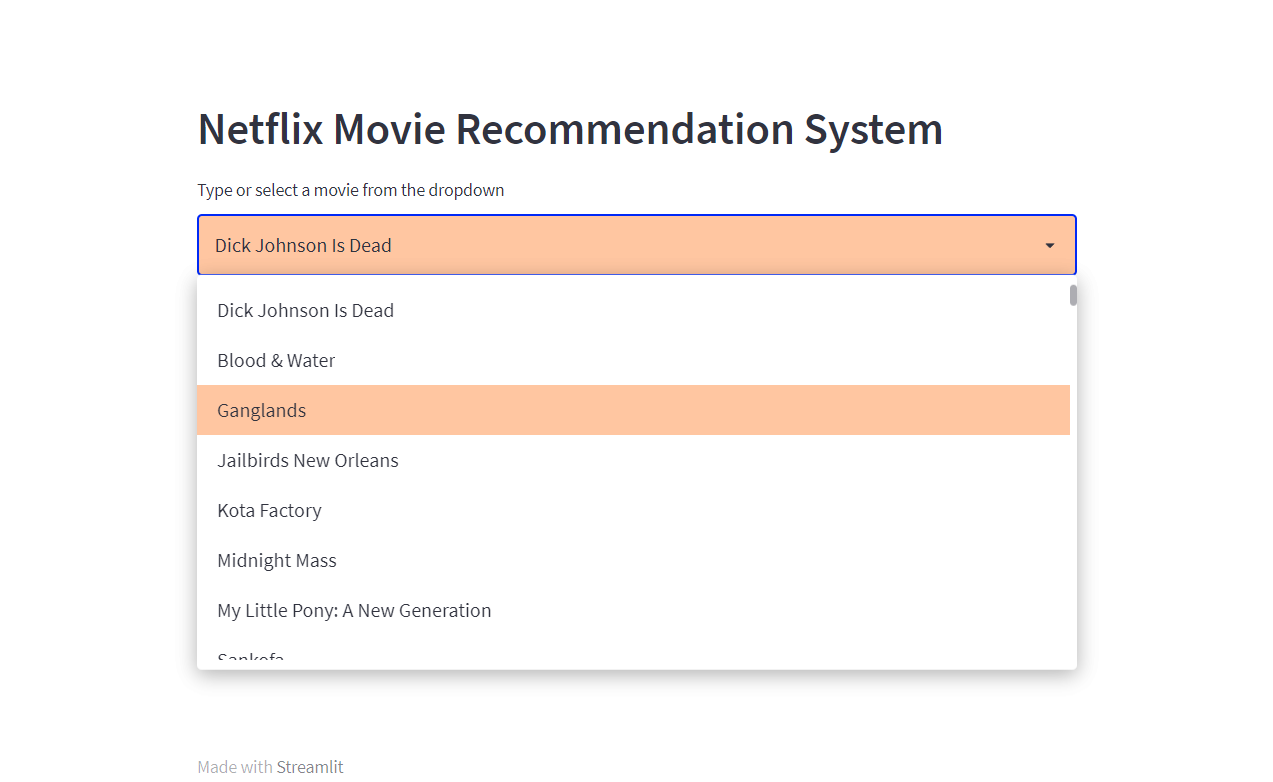

 <h3 style="padding: 20px;text-align: left;font-size: 16px; border-radius:5px; background-color:powderblue; font-family: Comic Sans MS; color:black;word-spacing: 4px;line-height: 1.3 ;">Note: suppose you want differnt inputs for you recommedation system like text , image , number , date , time you can use other stremlit input components <br>    
click the link to get more details :<b>https://docs.streamlit.io/library/api-reference/widgets     

## 3] adding button 

<h3  style=color:#222222;padding:20px;text-align:left;border-radius:5px;background-color:#F1ABB9;>if st.button('Show Recommendation'):<br>
     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;recommended_movie_names = get_recommendations(<b>selected_movie</b>)<br>
     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;recommended_movie_names


**output:**
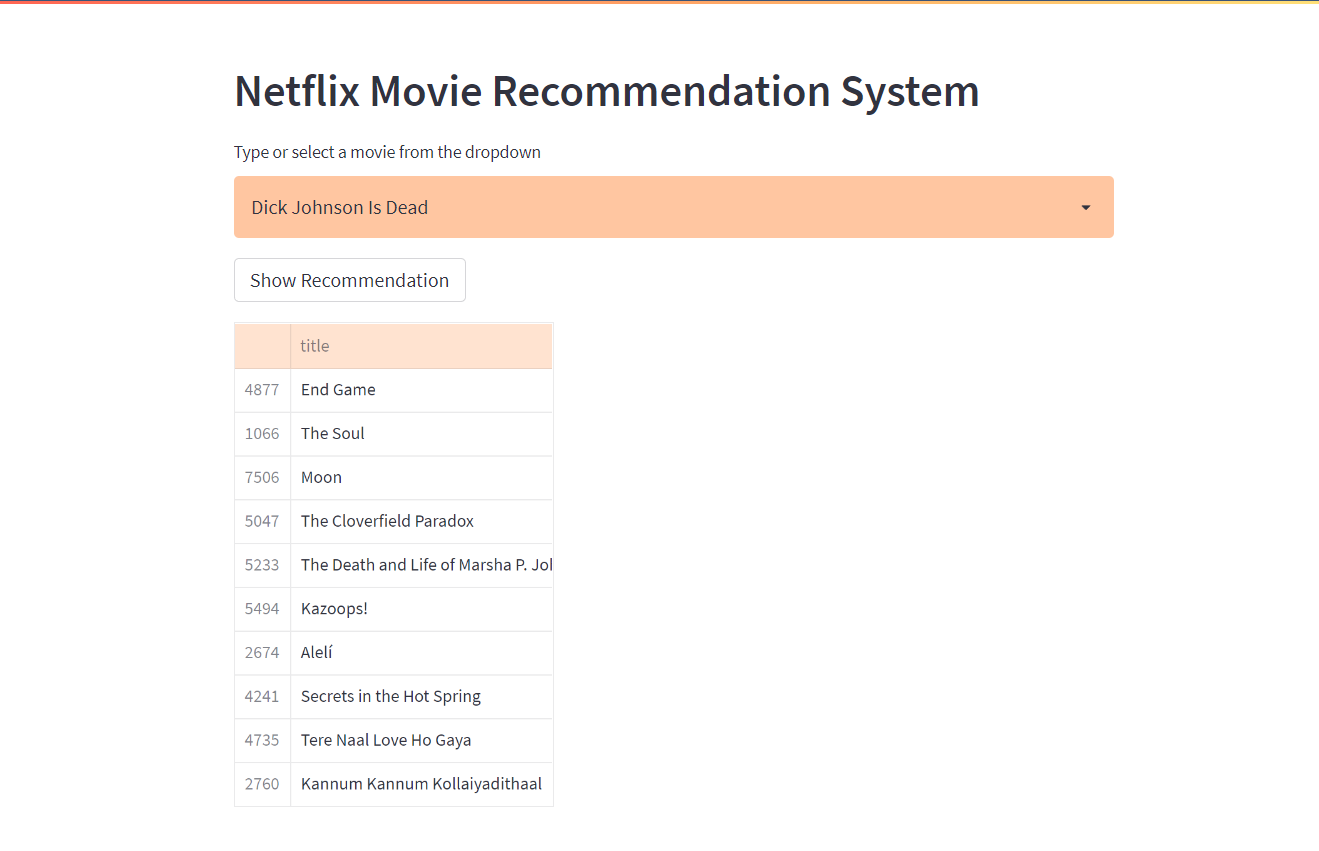

#### This app works fine but the list of recommendated titles looks little unattractive ,we will address this issue in next step 

In [ ]:
########################################################################################################################

# step 4: adding customized elements to streamlit 

## 1] using plotly table inside streamlit app

In [ ]:
def Table(df):
    fig=go.Figure(go.Table( columnorder = [1,2,3],
          columnwidth = [10,28],
            header=dict(values=[' Title','Description'],
                        line_color='black',font=dict(color='black',size= 19),height=40,
                        fill_color='#dd571c',#
                        align=['left','center']),
                cells=dict(values=[df.title,df.description],
                       fill_color='#ffdac4',line_color='grey',
                           font=dict(color='black', family="Lato", size=16),
                       align='left')))
    fig.update_layout(height=600, title ={'text': "Top 10 Movie Recommendations", 'font': {'size': 22}},title_x=0.5
                     )
    return fig.show()

In [ ]:
Table(get_recommendations('Kota Factory'))

<h3  style=color:#222222;padding:20px;text-align:left;border-radius:5px;background-color:#F1ABB9;>if st.button('Show Recommendation'):<br>
     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;recommended_movie_names = get_recommendations(<b>selected_movie</b>)<br>
     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Table(recommended_movie_names)


 <h3 style="padding: 20px;text-align: left;font-size: 16px; border-radius:5px; background-color:powderblue; font-family: Comic Sans MS; color:black;word-spacing: 4px;line-height: 1.3 ;"> Note : we have just added Table function inside our if condition of button ,when we use Table function inside streamlit just make little change to our Table function return statement

<h3  style=color:#222222;padding:20px;text-align:left;border-radius:5px;background-color:#F1ABB9;> def Table(df):<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;.......     <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;.......     <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;.......    <br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;return <b> st.plotly_chart(fig,use_container_width=True)

## 2] Adding lottie animation 

### lottie animation are really cool gif that make your app more attractive ,to use this 
*  <b>go to this site https://lottiefiles.com/
 
*  <b>download json file of the animation ,save it inside your working directory
*  <b>run below code 

In [ ]:
"""
lottie_coding = load_lottiefile("m4.json")   # m4.json is name of our downloaded json file
st_lottie(
    lottie_coding,
    speed=1,
    reverse=False,
    loop=True,
    quality="low",height=220
)

"""

#### final app : https://rushikeshdane-netflix-movie-recommendation-system-app-fj0bt0.streamlitapp.com/

#### github link: https://github.com/rushikeshdane/Netflix-Movie-Recommendation-System

In [ ]:
######################################################################################################################

# step 5 : app deployment

### for app deplyments follow this youtube video  https://youtu.be/sO4IKex53JY

#### for this particular app:

* <b>you can clone my github repo 
* <b>go to to https://streamlit.io/cloud ,create account
* <b>link your gitub to this account 
* <b>you just need to select github repo to deploy app on streamlit cloud

<h1 style="text-align: center;color:white;background-color:darkslategray;">  Please Upvote 👍 If You Liked this Notbook</h1>